In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

- 設計一個函數 `y = wx + b`
- w = 2、b = 3
- 讓tensorflow幫我們找出這個函數

In [10]:
# 用np生成100個點
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 2 + 3

In [11]:
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = w * x_data + b

In [22]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss=loss)

step:  0 , loss:  1.58661 , W:  [ 1.89627671] , B:  [ 4.31284714] , time:  0.010027170181274414


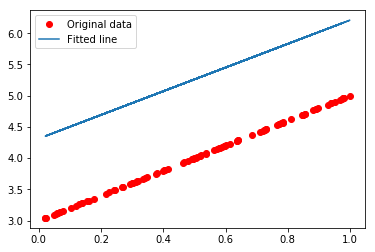

step:  20 , loss:  0.00238933 , W:  [ 1.83083105] , B:  [ 3.09337926] , time:  0.02205801010131836


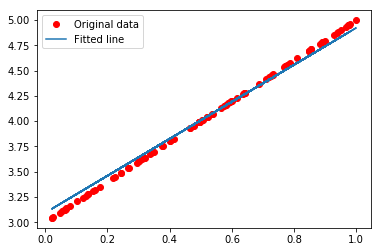

step:  40 , loss:  0.00016961 , W:  [ 1.9549278] , B:  [ 3.02487922] , time:  0.016041040420532227


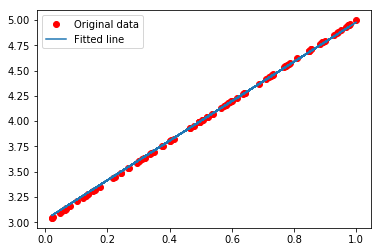

step:  60 , loss:  1.204e-05 , W:  [ 1.98799133] , B:  [ 3.00662875] , time:  0.020051240921020508


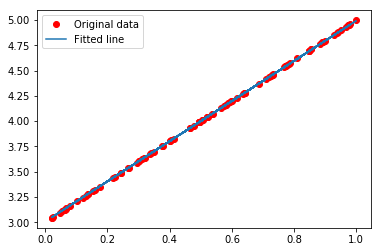

step:  80 , loss:  8.54802e-07 , W:  [ 1.99680018] , B:  [ 3.0017662] , time:  0.021055221557617188


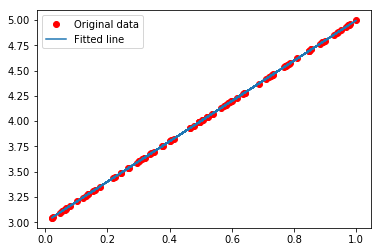

step:  100 , loss:  6.06798e-08 , W:  [ 1.99914753] , B:  [ 3.00047064] , time:  0.01905035972595215


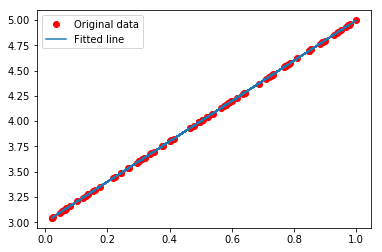

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    start = time.time()
    now = start
    for step in range(101):
        sess.run(train)
        if step % 20 == 0:
            print('step: ', step, ', loss: ', sess.run(loss), ', W: ', sess.run(w), ', B: ', sess.run(b), ', time: ', time.time() - now)
            plt.plot(x_data, y_data, 'ro', label='Original data')
            plt.plot(x_data, sess.run(w) * x_data + sess.run(b), label='Fitted line')
            plt.legend()
            plt.show()
            now = time.time()